# Data Mining II TM4
## Nama: Faiz Iqbal I'tishom
## NIM: 164231059
## Kelas: SD-A2

## Percobaan Praktikum TM4

### Import Library

In [227]:
import os
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from wordcloud import WordCloud

from textblob import TextBlob
from textblob import Word

import nltk
from nltk import pos_tag
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score as siluet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import silhouette_score, davies_bouldin_score

### 1. NLTK

In [228]:
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [229]:
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [230]:
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

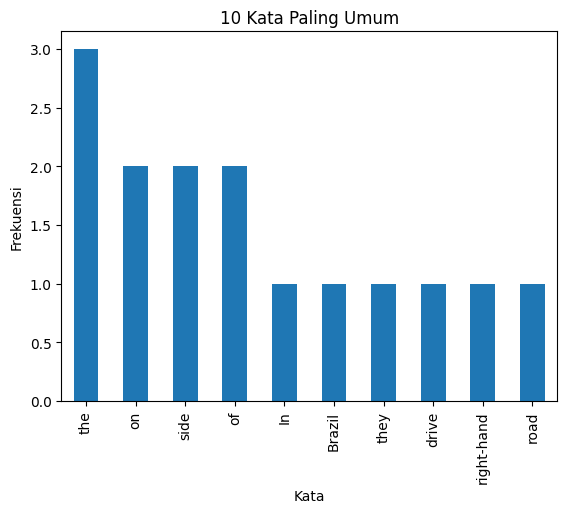

In [231]:
df_freq_tokens = pd.DataFrame(fdist1, columns=['Word', 'Frequency'])

df_freq_tokens.set_index('Word', inplace=True)
df_freq_tokens.plot(kind='bar', legend=False)
plt.title('10 Kata Paling Umum')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')
plt.show()


In [232]:
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [233]:
S = 'presumably I would like to Multiply my provision, saying that without crying'
print('Sentence: ',S)
stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster' , 'Porter', 'SnowBall']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ': ', ' '.join(st.stem(s) for s in S.split()))

Sentence:  presumably I would like to Multiply my provision, saying that without crying
Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri
SnowBall :  presum i would like to multipli my provision, say that without cri


In [234]:
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [235]:
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'
tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


In [236]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

print(TextBlob(T).words)

print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


### 2. TextBlob (Text Binary large Object) 

In [237]:
print("Stem: ", Word('running').stem())

print("Lemmatize: ", Word('went').lemmatize('v'))

Stem:  run
Lemmatize:  go


In [238]:
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

### 3. Sastrawi

In [239]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis & murah.


#### Lemmatizer dengan Sastrawi

In [240]:
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


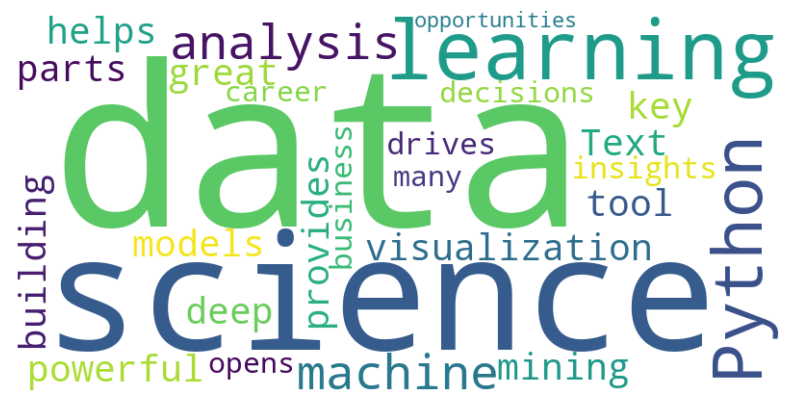

In [241]:
dummy_string = """
Python for data science is a powerful tool for data analysis and machine learning.
Text mining and data visualization are key parts of data science.
Machine learning with Python helps in building great models from data.
Data analysis provides deep insights and drives business decisions.
Learning data science opens up many career opportunities.
"""

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(dummy_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4. Clustering

✅ Berhasil memuat 1653 dokumen.
✅ Pra-pemrosesan selesai!
Bentuk Matriks TF-IDF (dokumen, fitur): (1653, 9604)

Melakukan reduksi dimensi dengan TruncatedSVD...
✅ Reduksi dimensi selesai.

Menjalankan K-Means...
Menjalankan K-Means++...
Menjalankan DBSCAN...

Membuat visualisasi cluster...


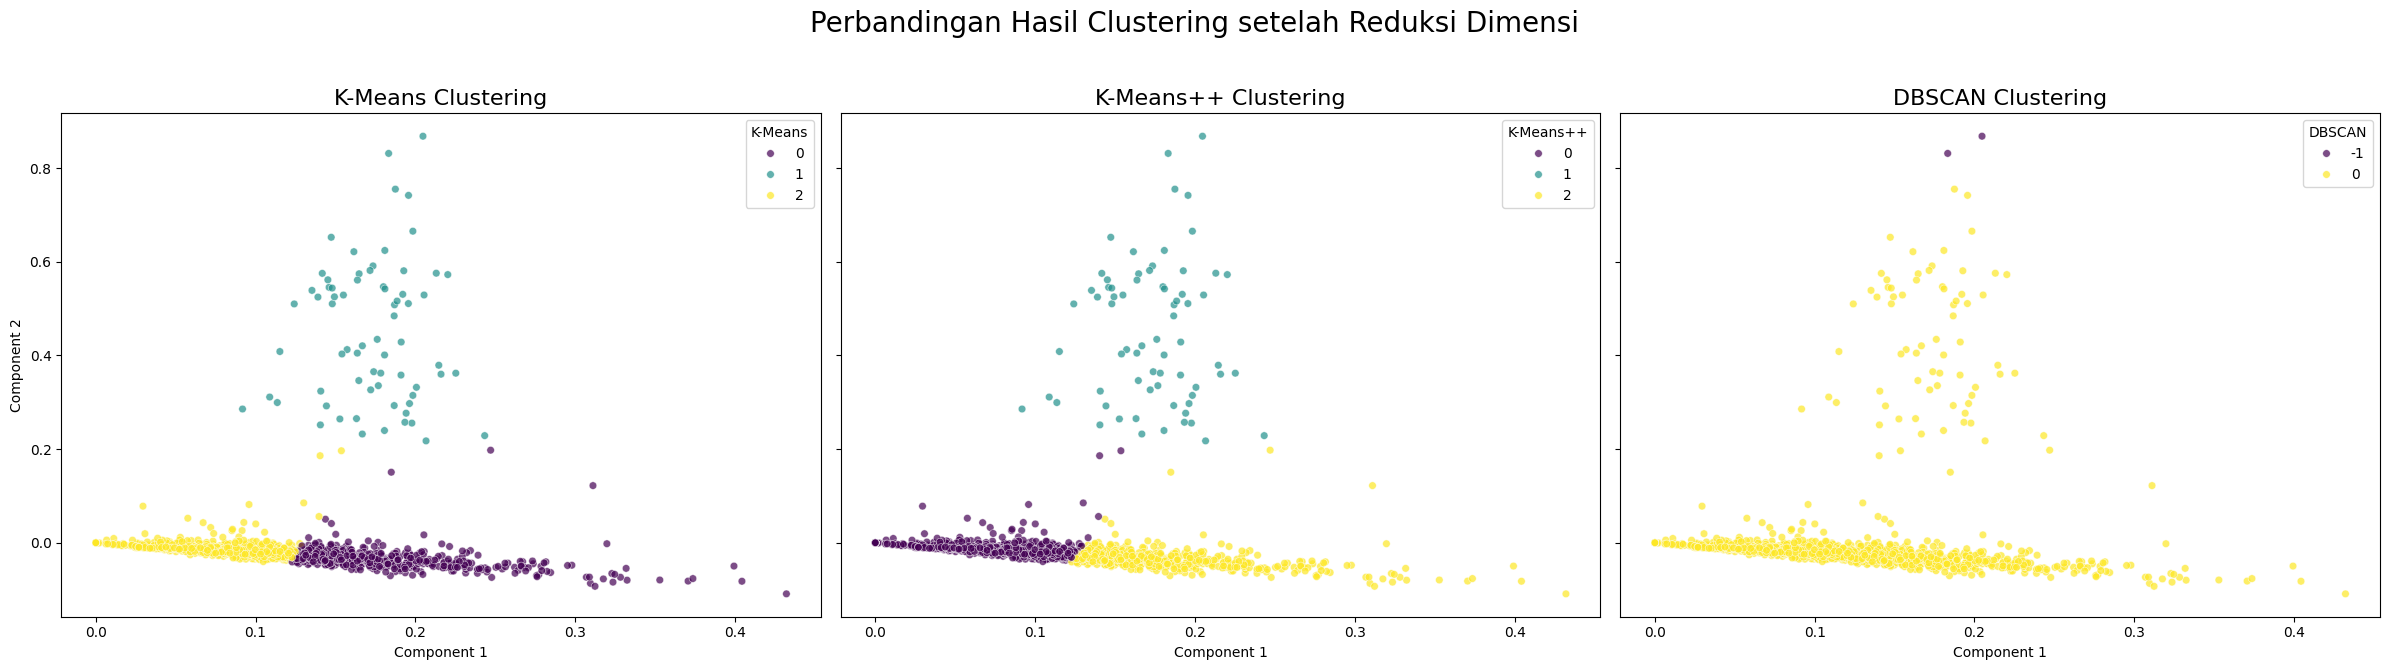

In [242]:
from nltk.corpus import stopwords

try:
    stopwords.words('english')
except LookupError:
    import nltk
    print("Mengunduh data NLTK...")
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('english'))
src_name = "20newsgroup.pckl" 

try:
    with open(src_name, 'rb') as fin:
        data = pickle.load(fin)
    docs = [doc for doc in data.data]
    label = data.target
    print(f"✅ Berhasil memuat {len(docs)} dokumen.")
except FileNotFoundError:
    print(f"❌ Error: File tidak ditemukan di '{src_name}'")
    docs = []

if docs:
    def preprocess(doc):
        tokens = word_tokenize(doc)
        cleaned_tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
        return " ".join(cleaned_tokens)

    docs_clear = [preprocess(d) for d in docs]
    print('✅ Pra-pemrosesan selesai!')

    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2) 
    X = tfidf_vectorizer.fit_transform(docs_clear)
    print("Bentuk Matriks TF-IDF (dokumen, fitur):", X.shape)

    k = 3
    seed = 99
    print("\nMelakukan reduksi dimensi dengan TruncatedSVD...")
    svd = TruncatedSVD(n_components=2, random_state=seed)
    X_reduced = svd.fit_transform(X) 
    print("✅ Reduksi dimensi selesai.")

    print("\nMenjalankan K-Means...")
    km = cluster.KMeans(n_clusters=k, init='random', n_init=10, random_state=seed)
    C_km = km.fit_predict(X_reduced) 

    print("Menjalankan K-Means++...")
    kmPP = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=seed)
    C_kmpp = kmPP.fit_predict(X_reduced)

    print("Menjalankan DBSCAN...")
    dbscan = cluster.DBSCAN(eps=0.1) 
    C_db = dbscan.fit_predict(X_reduced) 

    df_plot = pd.DataFrame(X_reduced, columns=['Component 1', 'Component 2'])
    df_plot['K-Means'] = C_km
    df_plot['K-Means++'] = C_kmpp
    df_plot['DBSCAN'] = C_db
    
    print("\nMembuat visualisasi cluster...")
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7), sharey=True)
    fig.suptitle('Perbandingan Hasil Clustering setelah Reduksi Dimensi', fontsize=20)

    sns.scatterplot(data=df_plot, x='Component 1', y='Component 2', hue='K-Means', palette='viridis', ax=ax1, s=30, alpha=0.7)
    ax1.set_title('K-Means Clustering', fontsize=16)

    sns.scatterplot(data=df_plot, x='Component 1', y='Component 2', hue='K-Means++', palette='viridis', ax=ax2, s=30, alpha=0.7)
    ax2.set_title('K-Means++ Clustering', fontsize=16)

    sns.scatterplot(data=df_plot, x='Component 1', y='Component 2', hue='DBSCAN', palette='viridis', ax=ax3, s=30, alpha=0.7)
    ax3.set_title('DBSCAN Clustering', fontsize=16)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [243]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]
for res in C:
    print(siluet(X,res), end = ',')

0.010730506482804368,0.010829360590806974,0.008818867561058671,

In [244]:
from sklearn.metrics.cluster import homogeneity_score as purity
for res in C:
    print(purity(label, res), end=', ')
print()


0.04139015100384187, 0.04138506411887602, 0.0011348284849938609, 


In [245]:
from sklearn.metrics import normalized_mutual_info_score as NMI
for res in C:
    print(NMI(label, res), end=', ')
print()

0.04719417638843329, 0.04723069045282428, 0.0022504221723698803, 


Pra-pemrosesan untuk visualisasi selesai!

Menampilkan Word Cloud...


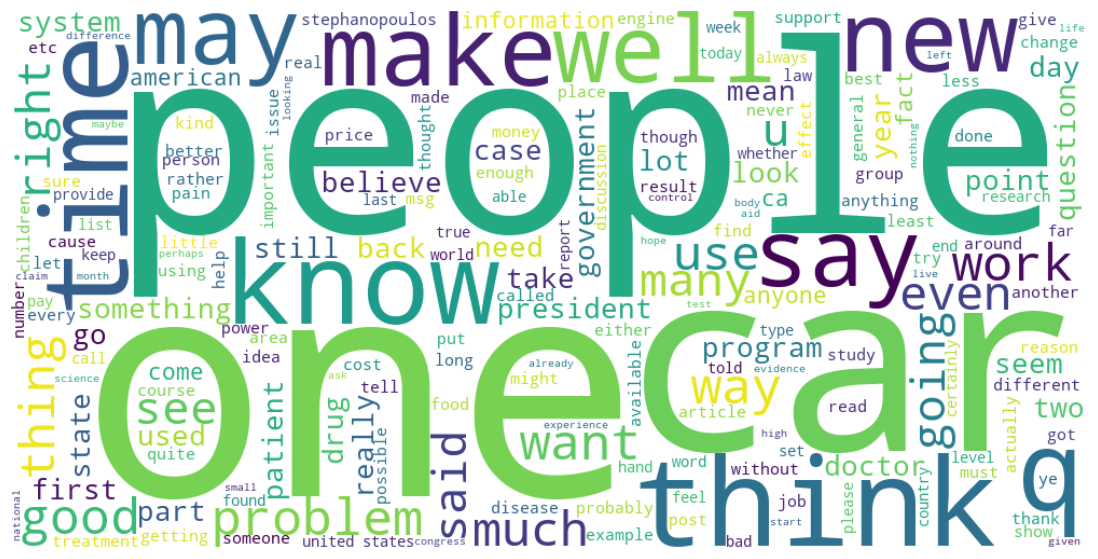

In [246]:
def preprocess(doc):
    tokens = word_tokenize(doc)
    cleaned_tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
    return " ".join(cleaned_tokens)

def preprocess(doc):
    tokens = word_tokenize(doc)
    cleaned_tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
    return " ".join(cleaned_tokens)

docs_clear = [preprocess(d) for d in docs]
print('Pra-pemrosesan untuk visualisasi selesai!')

full_text = ' '.join(docs_clear)

if full_text and not full_text.isspace():
    wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="viridis").generate(full_text)
    
    print("\nMenampilkan Word Cloud...")
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


Menampilkan Bar Chart Top 10 Kata...


C:\Users\Faiz Iqbal\AppData\Local\Temp\ipykernel_7720\2239544342.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_top10, palette='plasma')


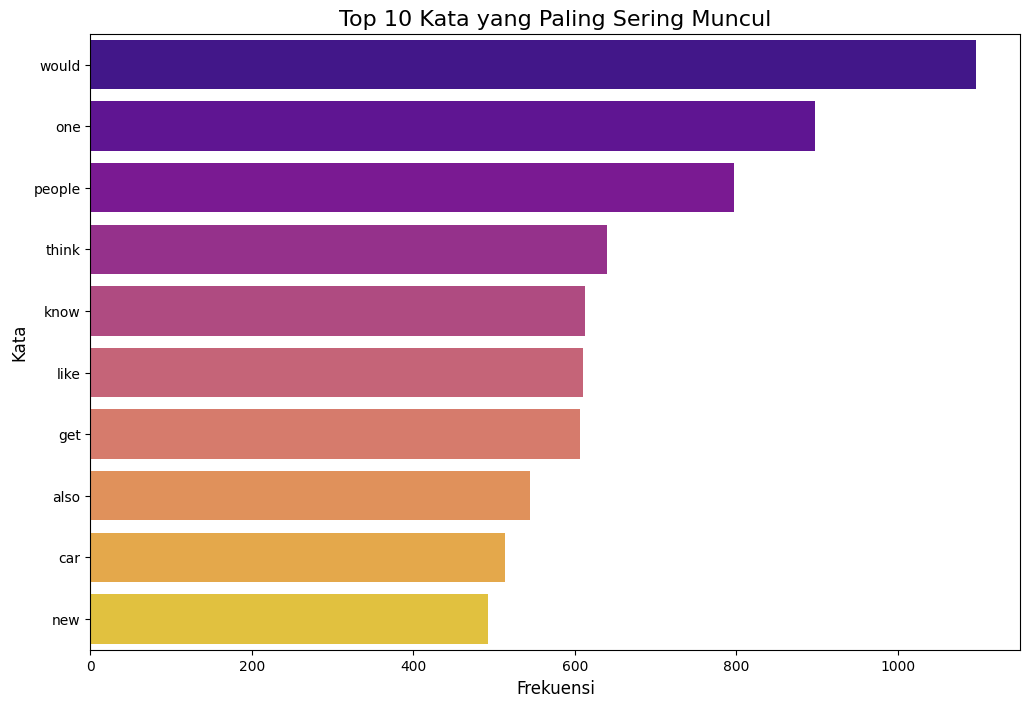

In [247]:
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(docs_clear)

sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

top_10_words = words_freq[:10]

df_top10 = pd.DataFrame(top_10_words, columns=['Kata', 'Frekuensi'])

print("\nMenampilkan Bar Chart Top 10 Kata...")
plt.figure(figsize=(12, 8))
sns.barplot(x='Frekuensi', y='Kata', data=df_top10, palette='plasma')
plt.title('Top 10 Kata yang Paling Sering Muncul', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)
plt.show()

## Tugas Praktikum

### Subset Data

In [248]:
folder_path = "C:/Uner/Semester 5/Data Mining II/Coolyeah/TM4"
documents = []
titles = []

print(f"Memuat file dari folder '{folder_path}'...")
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        title = filename.replace('.txt', '').replace('_', ' ')
        titles.append(title)
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            documents.append(file.read())
print(f"✅ Berhasil memuat {len(documents)} dokumen.")

Memuat file dari folder 'C:/Uner/Semester 5/Data Mining II/Coolyeah/TM4'...
✅ Berhasil memuat 10 dokumen.


### Pre-Processing dengan NLTK & Sastrawi

In [249]:
stemmer_sastrawi = StemmerFactory().create_stemmer()
stopword_remover_sastrawi = StopWordRemoverFactory().create_stop_word_remover()
try:
    stopwords_nltk_indonesian = set(stopwords.words('indonesian'))
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')
    stopwords_nltk_indonesian = set(stopwords.words('indonesian'))

def preprocess_sastrawi(text):
    text = text.lower()
    text = stopword_remover_sastrawi.remove(text)
    text = stemmer_sastrawi.stem(text)
    text = re.sub(r'[^a-z\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip()

def preprocess_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords_nltk_indonesian]
    return ' '.join(filtered_tokens)

print("\nMelakukan preprocessing dengan dua metode terpisah...")
processed_docs_sastrawi = [preprocess_sastrawi(doc) for doc in documents]
processed_docs_nltk = [preprocess_nltk(doc) for doc in documents]
print("Preprocessing dengan Sastrawi dan NLTK selesai.")


Melakukan preprocessing dengan dua metode terpisah...
Preprocessing dengan Sastrawi dan NLTK selesai.


### Cluster Analysis

In [250]:
all_results = []

def run_full_analysis(processed_docs, titles, method_name):
    print(f"\n{'='*25} ANALISIS UNTUK PREPROCESSING: {method_name.upper()} {'='*25}")

    all_text = ' '.join(processed_docs)
    wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud (Metode: {method_name})', size=16)
    plt.show()

    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs)
    
    word_counts = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    word_names = tfidf_vectorizer.get_feature_names_out()
    top_20_words = pd.DataFrame({'kata': word_names, 'frekuensi': word_counts}).sort_values(by='frekuensi', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='frekuensi', y='kata', data=top_20_words, palette='plasma')
    plt.title(f'20 Kata Paling Umum (Metode: {method_name})', size=16)
    plt.show()

    k = 3
    kmeans_random = KMeans(n_clusters=k, init='random', n_init=10, random_state=42).fit(tfidf_matrix)
    kmeans_plus = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(tfidf_matrix)
    dbscan = DBSCAN(eps=0.7, min_samples=2).fit(tfidf_matrix)

    clustering_results = {
        "K-Means (Random)": kmeans_random.labels_,
        "K-Means++": kmeans_plus.labels_,
        "DBSCAN": dbscan.labels_
    }

    print(f"\n--- Menampilkan Visualisasi Cluster untuk Preprocessing {method_name} ---")
    
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(tfidf_matrix.toarray())
    df_pca = pd.DataFrame(coords, columns=['x', 'y'])
    df_pca['title'] = titles

    for name, labels in clustering_results.items():
        if len(set(labels)) > 1:
            df_pca['cluster'] = labels
            plt.figure(figsize=(12, 8))
            sns.scatterplot(data=df_pca, x='x', y='y', hue='cluster', palette='deep', s=200, alpha=0.8)
            for i, title in enumerate(df_pca['title']):
                plt.text(df_pca['x'][i] + 0.01, df_pca['y'][i], title, fontsize=9)
            plt.title(f'Visualisasi Cluster (Preprocessing: {method_name}, Algoritma: {name})', size=16)
            plt.show()

    print(f"\n--- Hasil Validasi untuk Preprocessing {method_name} ---")
    for name, labels in clustering_results.items():
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if num_clusters > 1:
            sil_score = silhouette_score(tfidf_matrix, labels)
            db_score = davies_bouldin_score(tfidf_matrix.toarray(), labels)
        else:
            sil_score, db_score = None, None
        
        all_results.append({
            "Preprocessing": method_name,
            "Algoritma": name,
            "Jml Cluster": num_clusters,
            "Silhouette Score": sil_score,
            "Davies-Bouldin Score": db_score
        })

### Run Model

##### Model Dengan Sastrawi


========================= ANALISIS UNTUK PREPROCESSING: SASTRAWI =========================


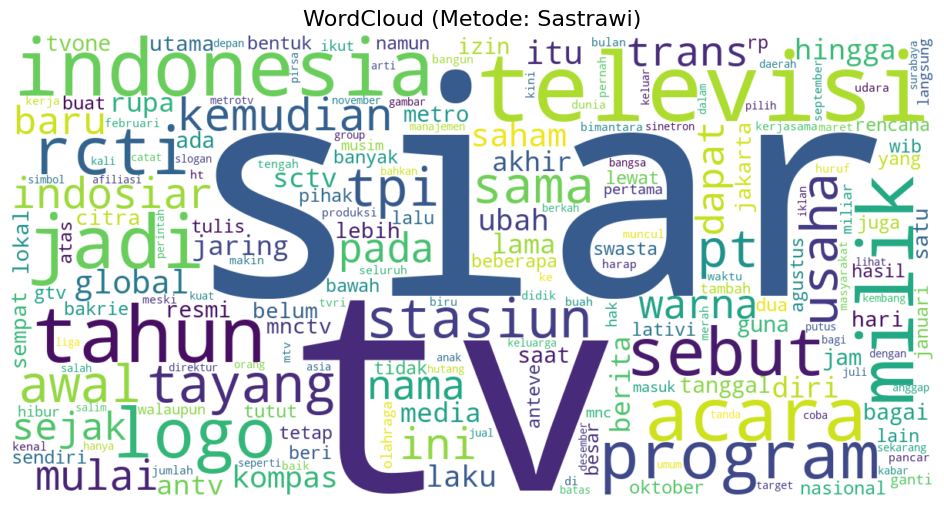

C:\Users\Faiz Iqbal\AppData\Local\Temp\ipykernel_7720\3048318910.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frekuensi', y='kata', data=top_20_words, palette='plasma')


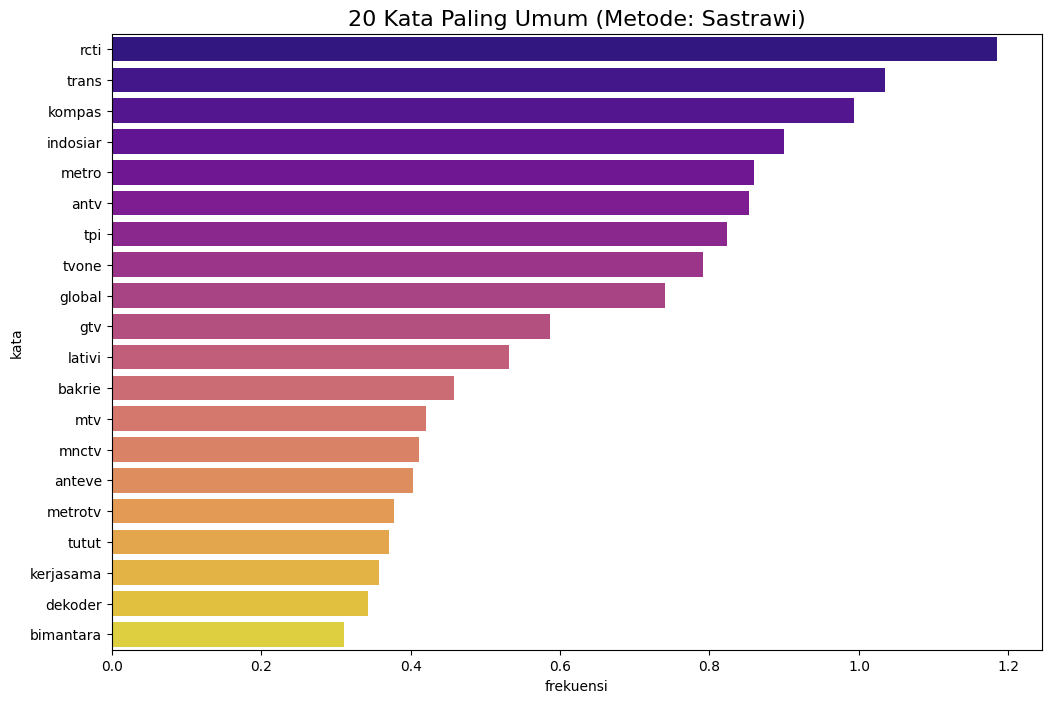


--- Menampilkan Visualisasi Cluster untuk Preprocessing Sastrawi ---


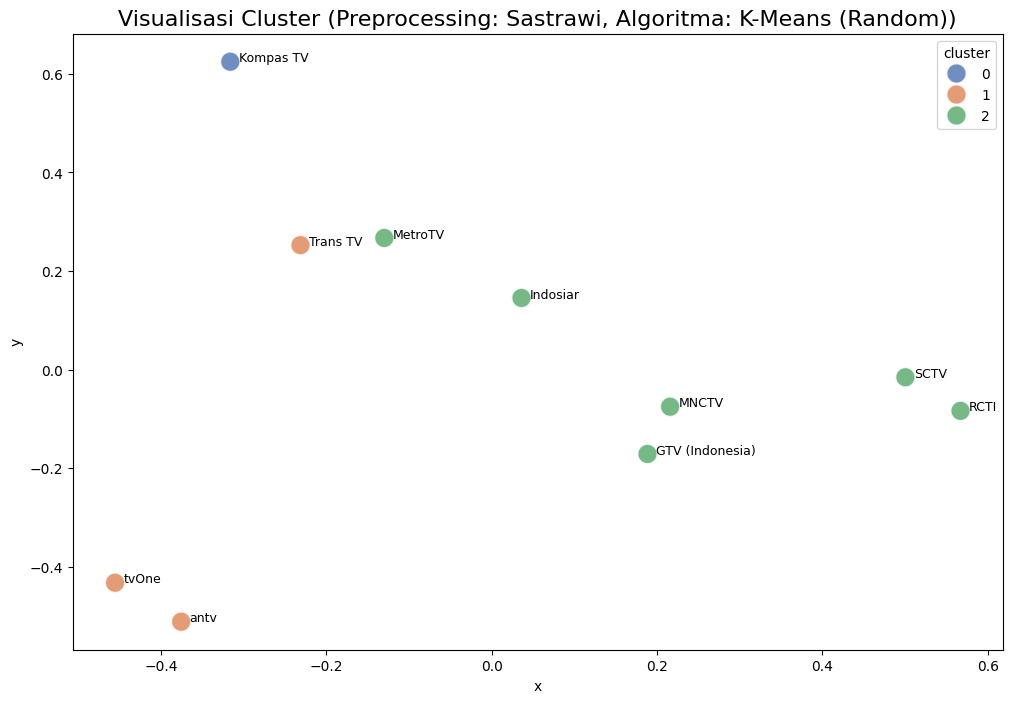

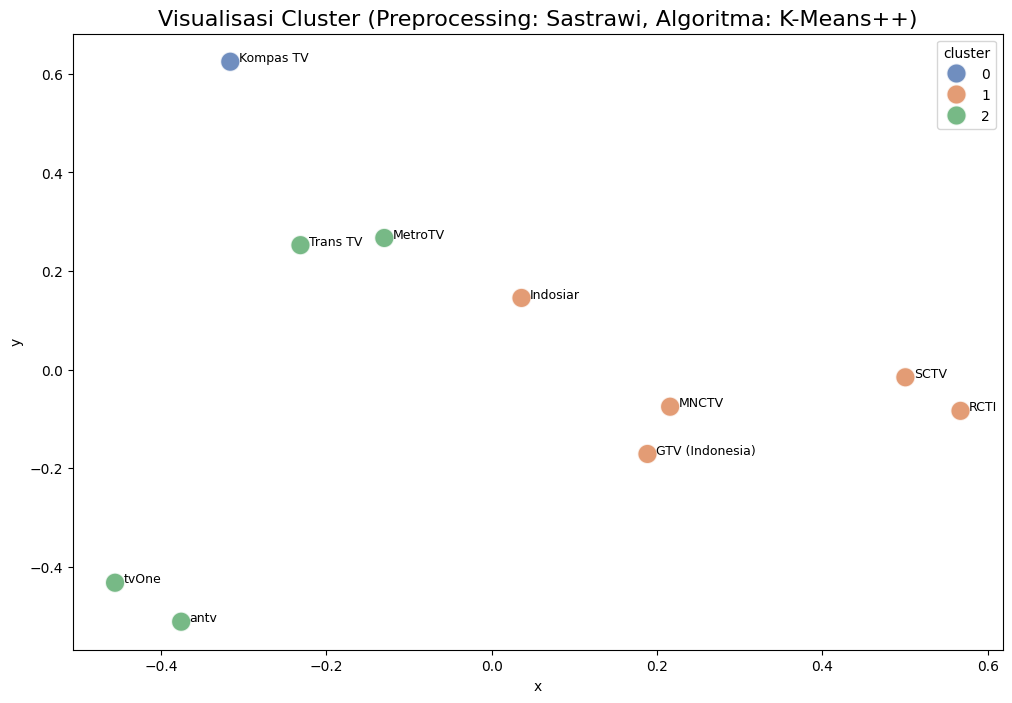


--- Hasil Validasi untuk Preprocessing Sastrawi ---


In [251]:
run_full_analysis(processed_docs_sastrawi, titles, "Sastrawi")


========================= ANALISIS UNTUK PREPROCESSING: NLTK =========================


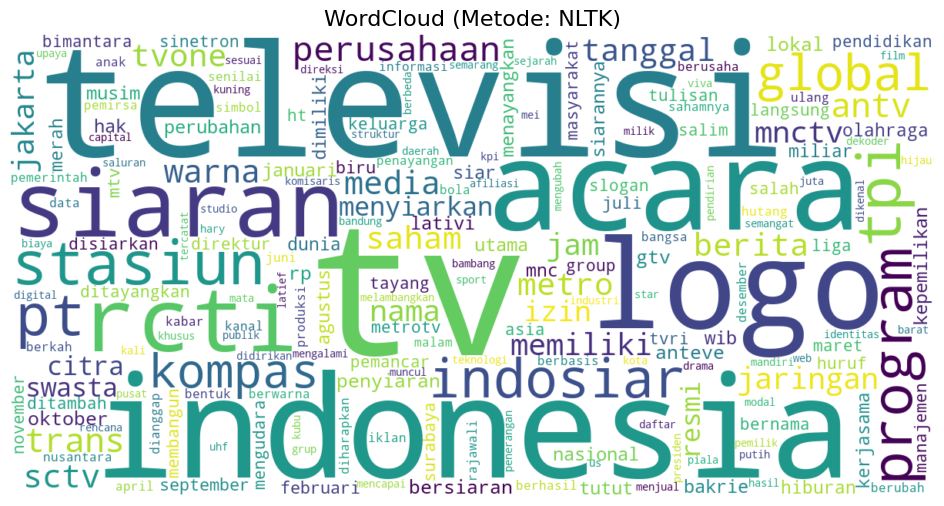

C:\Users\Faiz Iqbal\AppData\Local\Temp\ipykernel_7720\3048318910.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frekuensi', y='kata', data=top_20_words, palette='plasma')


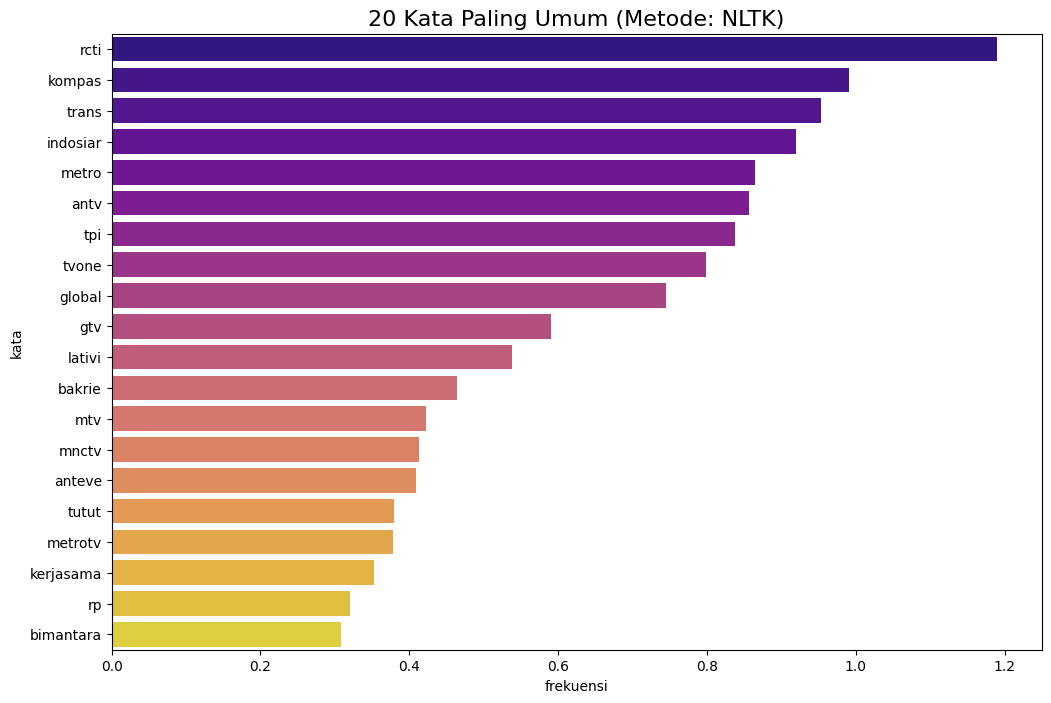


--- Menampilkan Visualisasi Cluster untuk Preprocessing NLTK ---


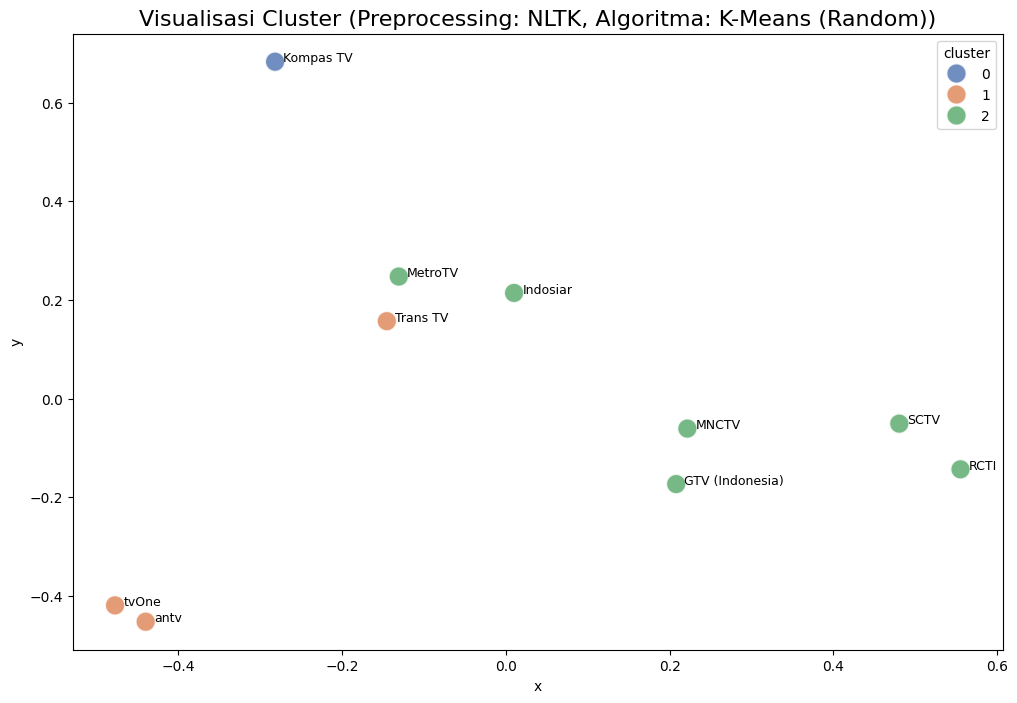

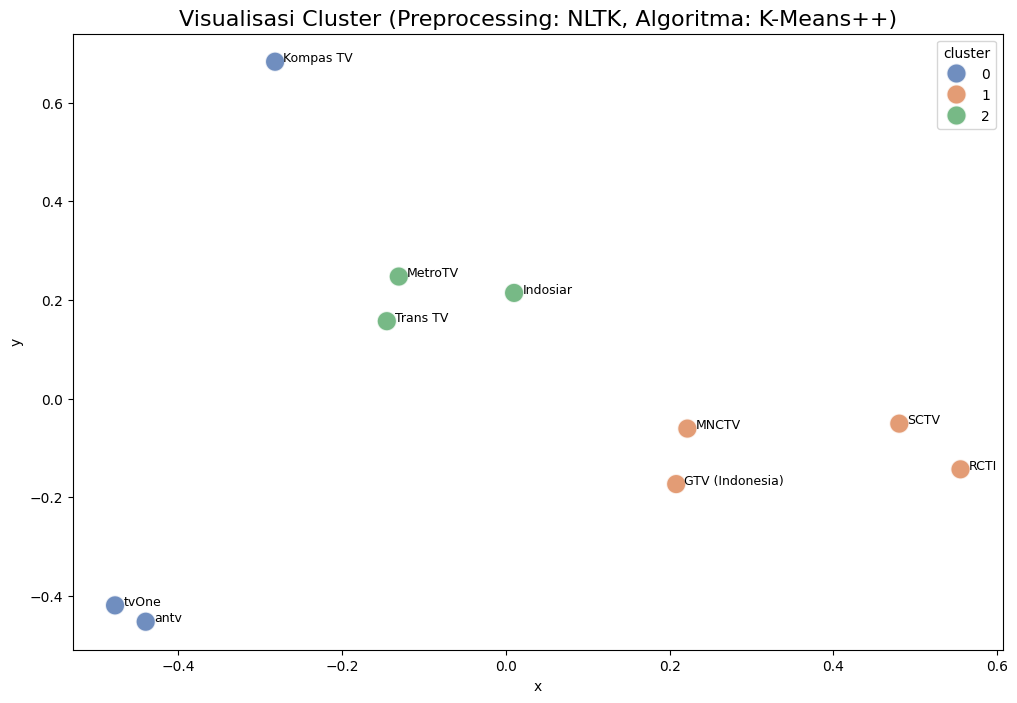


--- Hasil Validasi untuk Preprocessing NLTK ---


In [252]:
run_full_analysis(processed_docs_nltk, titles, "NLTK")

##### Model Dengan Sastrawi

### Evaluasi Model

In [253]:
print(f"\n{'='*30} KESIMPULAN AKHIR & PERBANDINGAN TOTAL {'='*30}")

final_df = pd.DataFrame(all_results).dropna().sort_values(by='Silhouette Score', ascending=False)
final_df['Silhouette Score'] = final_df['Silhouette Score'].map('{:.4f}'.format)
final_df['Davies-Bouldin Score'] = final_df['Davies-Bouldin Score'].map('{:.4f}'.format)

print("Tabel Perbandingan Semua Kombinasi (Diurutkan berdasarkan Silhouette Score terbaik):")
print(final_df.to_string(index=False))

print("  - Silhouette Score: Makin TINGGI makin baik (mendekati 1).")
print("  - Davies-Bouldin Score: Makin RENDAH makin baik (mendekati 0).")


============================== KESIMPULAN AKHIR & PERBANDINGAN TOTAL ==============================
Tabel Perbandingan Semua Kombinasi (Diurutkan berdasarkan Silhouette Score terbaik):
Preprocessing        Algoritma  Jml Cluster Silhouette Score Davies-Bouldin Score
     Sastrawi        K-Means++            3           0.0263               1.8102
     Sastrawi K-Means (Random)            3           0.0249               1.7313
         NLTK        K-Means++            3           0.0249               2.0003
         NLTK K-Means (Random)            3           0.0231               1.7415
  - Silhouette Score: Makin TINGGI makin baik (mendekati 1).
  - Davies-Bouldin Score: Makin RENDAH makin baik (mendekati 0).
